In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os 
import numpy as np
import re

In [2]:
##################################################
####### import function 
##################################################

class file_Sorption:
    
    def read_file(self, path, filename):
        #print(path +'/'+ filename)        
        try:
            df = pd.read_excel(path + filename, sheet_name='DVS Data')
            if df.columns[0] == 'DVS-INTRINSIC DATA FILE':
                self.filename = filename
                self.instrument = df.columns[0].split()[0]
                self.sample_mass = df.iloc[4, 7]
                self.fluid = 'water vapor'
                comments  = str(df.iloc[3, 1])
                method = str(df.iloc[1, 1])
                df.columns = df.iloc[22, :]
                df = df.iloc[23:, :]
                df = df.reset_index(drop=True)
                df = df.astype('float')
                # renaming columns to common notation
                df = df[['Time (min)', 'dm (%) - ref', 'Target RH (%)', 'Actual RH (%)', 'Target Sample Temp', 'Actual Sample Temp']]
                df.columns = ['time', 'uptake', 'RH_target', 'RH_actual', 'temp_target', 'temp_actual']
                self.temperature = 'Actual Sample Temp: {0:.2f} +- {1:.2f}'.format(df[df.temp_target==df.temp_target.min()].temp_actual.mean(), df[df.temp_target==df.temp_target.min()].temp_actual.std())
                self.equilibration_interval = '---'
                self.comments = comments
                self.method = method
                self.data = df
                #print(self.data.head())
            elif df.columns[0] == 'DVS-Advantage-Plus-Data-File':
                self.filename = filename
                self.instrument = df.columns[0][:-10]
                self.sample_mass = df.iloc[27, 1]
                self.fluid = 'water vapor'
                comments  = str(df.iloc[8, 1])
                method = str(df.iloc[3, 1])
                df.columns = df.iloc[39, :]
                df = df.iloc[40:, :30]
                df = df.reset_index(drop=True)
                df = df[[i for i in df.columns if (i == i) & (i != 'Chiller State')]]
                df = df.astype('float')
                # renaming columns to common notation
                df = df[['Time [minutes]', 'dm (%) - ref', 'Mass [mg]', 'Target Partial Pressure (Solvent A) [%]', 'Measured Partial Pressure (Solvent A) [%]', 'Target Preheater Temp. [celsius]', 'Measured Preheater Temp. [celsius]']]
                df.columns = ['time', 'uptake', 'mass', 'RH_target', 'RH_actual', 'temp_target', 'temp_actual']
                self.temperature = 'Temp. [celsius]: {0:.2f} +- {1:.2f}'.format(df[df.temp_target==df.temp_target.min()].temp_actual.mean(), df[df.temp_target==df.temp_target.min()].temp_actual.std())
                self.equilibration_interval = '---'
                self.comments = comments
                self.method = method
                self.data = df
                #print(self.data.head())
        except Exception as e:
            print(e)
        #print(self.__dict__.keys())
        # test if import was correct
        if (list(self.__dict__.keys()) == ['filename', 'instrument', 'sample_mass', 'fluid', 'temperature', 'equilibration_interval', 'comments', 'method', 'data'])  :
            print('File {0} read succesfull'.format(filename))
            self.import_success = True
        else:
            self.import_success = False


### Need to run corresponding heatmap calculations befor running code below

## Heatmaps powders 27C, 0-30RH

In [3]:
import os

number_of_steps = 100
values = {}
values['min_time'] = 1
values['step'] = 1
t_ads_range = np.linspace(float(values['min_time']), float(values['min_time']) + (number_of_steps)*float(values['step']), num=number_of_steps, endpoint=False)
t_des_range = np.linspace(float(values['min_time']), float(values['min_time']) + (number_of_steps)*float(values['step']), num=number_of_steps, endpoint=False)




path = 'kinetics_fitting/27C/'
#for i in filelist:
#    print(i)
filelist = ['Heatmap_Syloid_ads1.0-100.0_des1.0-100.0_n100_30RH.csv',
            'Heatmap_ROS-039_ads1.0-100.0_des1.0-100.0_n100_30RH.csv', 
            'Heatmap_MIL-160_ads1.0-100.0_des1.0-100.0_n100_30RH.csv', 
            'Heatmap_ROS-037_ads1.0-100.0_des1.0-100.0_n100_30RH.csv',
            'Heatmap_MOF-303_ads1.0-100.0_des1.0-100.0_n100_30RH.csv',
            'Heatmap_ROS-040_ads1.0-100.0_des1.0-100.0_n100_30RH.csv', 
            'Heatmap_CAU-10_ads1.0-100.0_des1.0-100.0_n100_30RH.csv',
            'Heatmap_Al-fumarate_ads1.0-100.0_des1.0-100.0_n100_30RH.csv'

            ]

heatmap_list = []

for filename in filelist:
    print(filename)
    working_capacity_per_time_array = np.loadtxt( path + filename,  delimiter=',')
    heatmap_list.append(working_capacity_per_time_array)

Heatmap_Syloid_ads1.0-100.0_des1.0-100.0_n100_30RH.csv
Heatmap_ROS-039_ads1.0-100.0_des1.0-100.0_n100_30RH.csv
Heatmap_MIL-160_ads1.0-100.0_des1.0-100.0_n100_30RH.csv
Heatmap_ROS-037_ads1.0-100.0_des1.0-100.0_n100_30RH.csv
Heatmap_MOF-303_ads1.0-100.0_des1.0-100.0_n100_30RH.csv
Heatmap_ROS-040_ads1.0-100.0_des1.0-100.0_n100_30RH.csv
Heatmap_CAU-10_ads1.0-100.0_des1.0-100.0_n100_30RH.csv
Heatmap_Al-fumarate_ads1.0-100.0_des1.0-100.0_n100_30RH.csv


## Figure S108

8


C:\Users\Andrey.Bezrukov\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:43: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


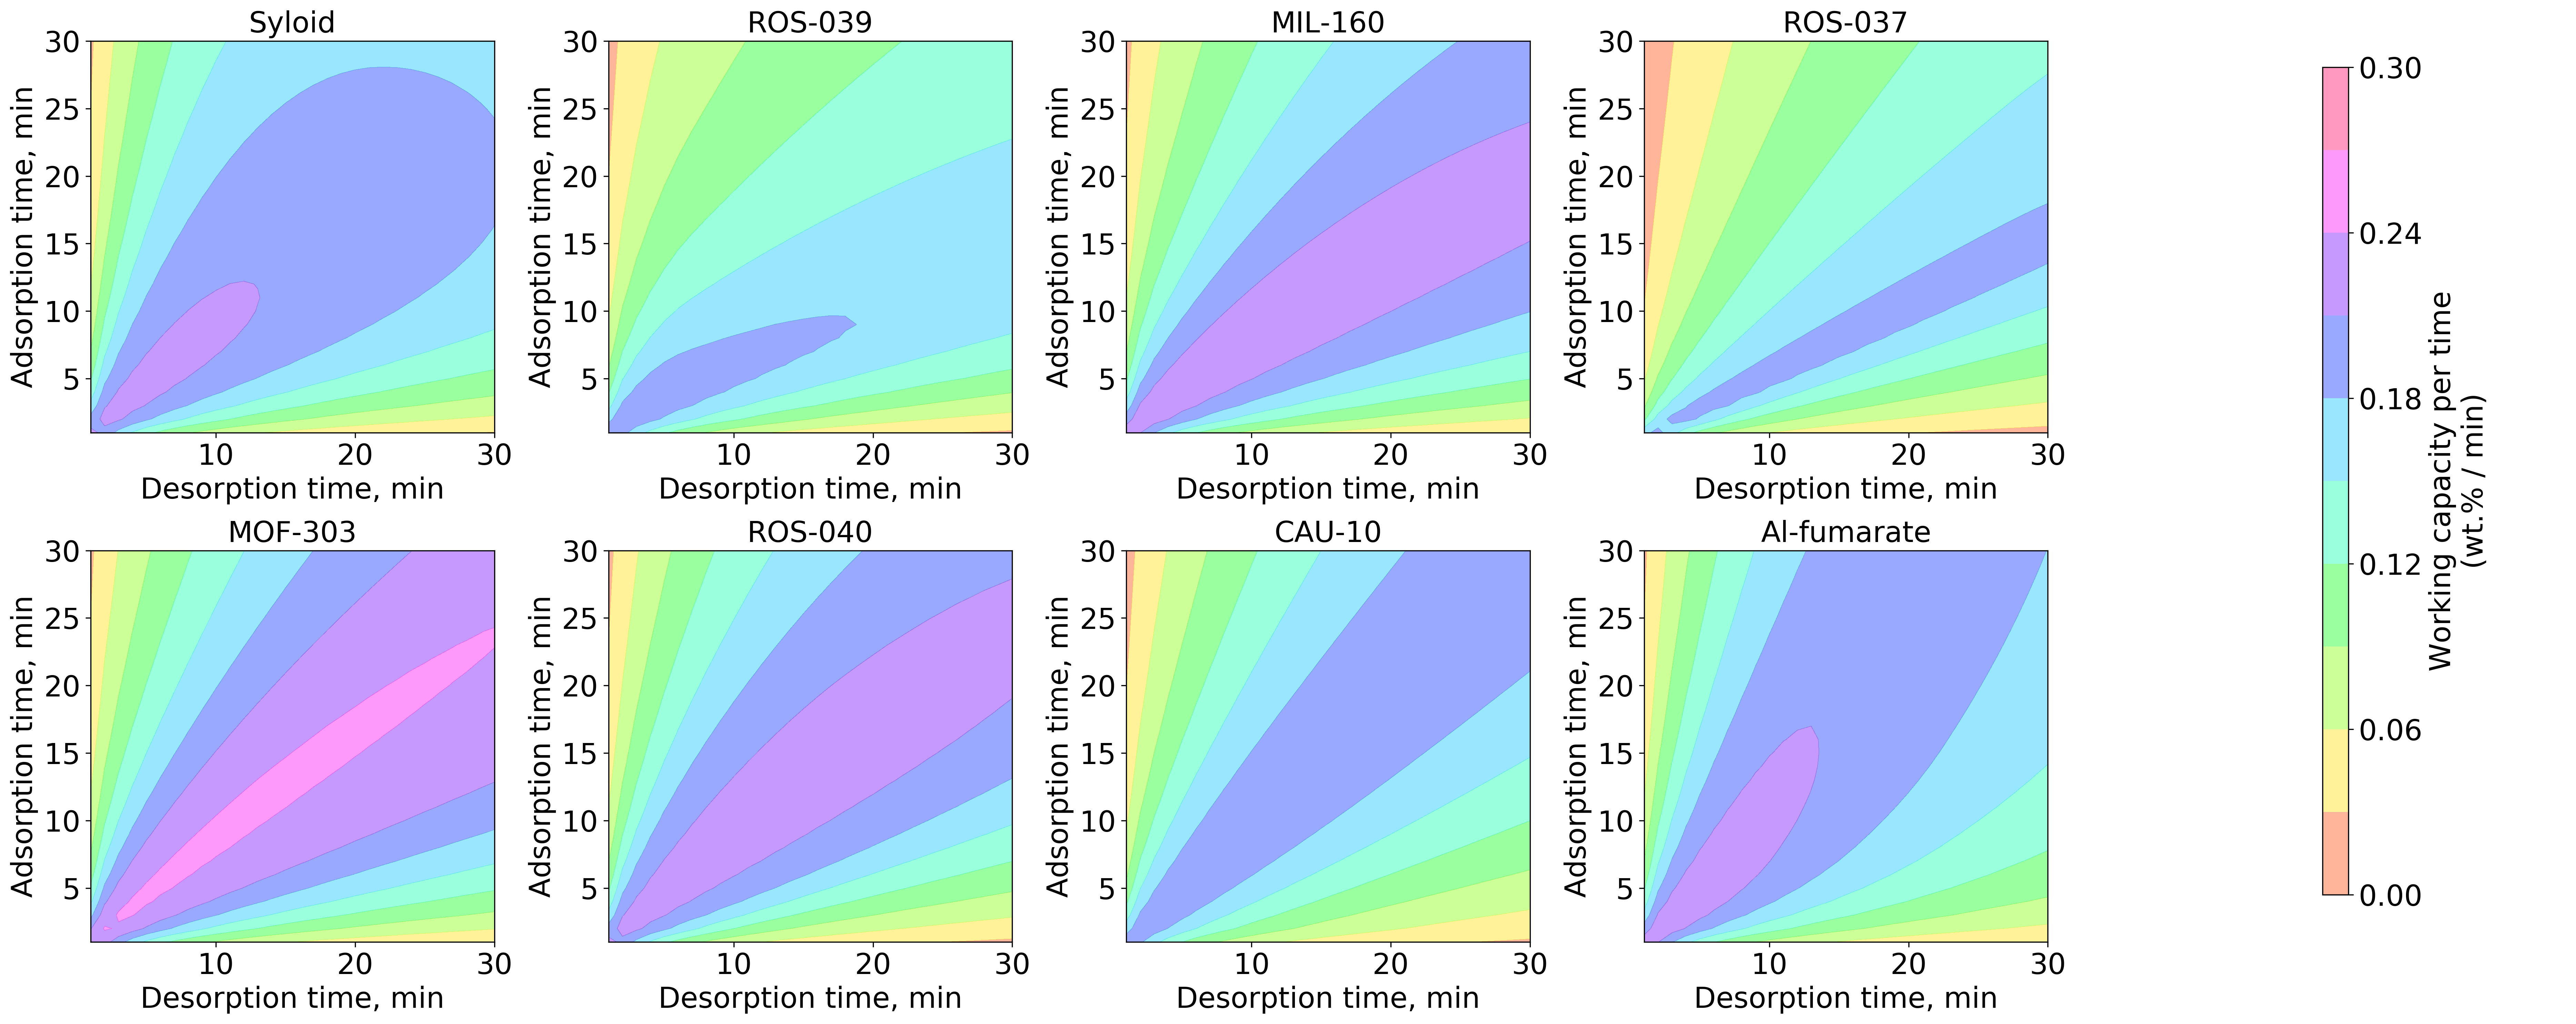

In [134]:
f, axarr = plt.subplots(2, 5, figsize = (5*5, 2*(5)), dpi=300)
max_wc = 0.3
max_diff = 1
idx = 30
text_size = 20
print(len(heatmap_list))
for i, vert_hm in enumerate(heatmap_list[:4]):
    cp1 = axarr[0, i].contourf(t_des_range[:idx], t_ads_range[:idx],vert_hm[:idx, :idx] ,
                            #levels=[h*max_wc for h in [0, 0.1, 0.2, 0.3, 0.4 ,0.5, 0.6 ,0.7, 0.8, 0.9, 1.0]],
                            levels=[h*max_wc for h in np.linspace(0, 1, 11)], vmin=0, vmax=max_wc, cmap='hsv', alpha=0.4
                           )
    axarr[0, i].tick_params(axis='x', labelsize=text_size)
    axarr[0, i].tick_params(axis='y', labelsize=text_size)
    axarr[0, i].set_xlabel('Desorption time, min', fontsize=text_size)
    axarr[0, i].set_ylabel('Adsorption time, min', fontsize=text_size)
    axarr[0, i].set_title(filelist[i].split('_')[1], fontsize=text_size)
    axarr[0, i].set_ylim([1, idx])
    axarr[0, i].set_xlim([1, idx])
    axarr[0, 4].axis('off')
for i, vert_hm in enumerate(heatmap_list[4:]):
    cp1 = axarr[1, i].contourf(t_des_range[:idx], t_ads_range[:idx],vert_hm[:idx, :idx] ,
                            #levels=[h*max_wc for h in [0, 0.1, 0.2, 0.3, 0.4 ,0.5, 0.6 ,0.7, 0.8, 0.9, 1.0]],
                            levels=[h*max_wc for h in np.linspace(0, 1, 11)], vmin=0, vmax=max_wc, cmap='hsv', alpha=0.4
                           )
    axarr[1, i].tick_params(axis='x', labelsize=text_size)
    axarr[1, i].tick_params(axis='y', labelsize=text_size)
    axarr[1, i].set_xlabel('Desorption time, min', fontsize=text_size)
    axarr[1, i].set_ylabel('Adsorption time, min', fontsize=text_size)
    axarr[1, i].set_title(filelist[i+4].split('_')[1], fontsize=text_size)
    axarr[1, i].set_ylim([1, idx])
    axarr[1, i].set_xlim([1, idx])
    axarr[1, 4].axis('off')
cax = plt.axes([0.90, 0.13, 0.01, 0.80])
cbar = plt.colorbar(cp1, cax=cax)
cbar.ax.tick_params(labelsize=text_size)
cbar.set_label('Working capacity per time\n(wt.% / min)', rotation=90, fontsize=text_size)
plt.tight_layout()
plt.savefig('Figure_Heatmaps_27C_30RH_30_2rows.png', dpi=300)
plt.show()

8


C:\Users\Andrey.Bezrukov\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:43: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


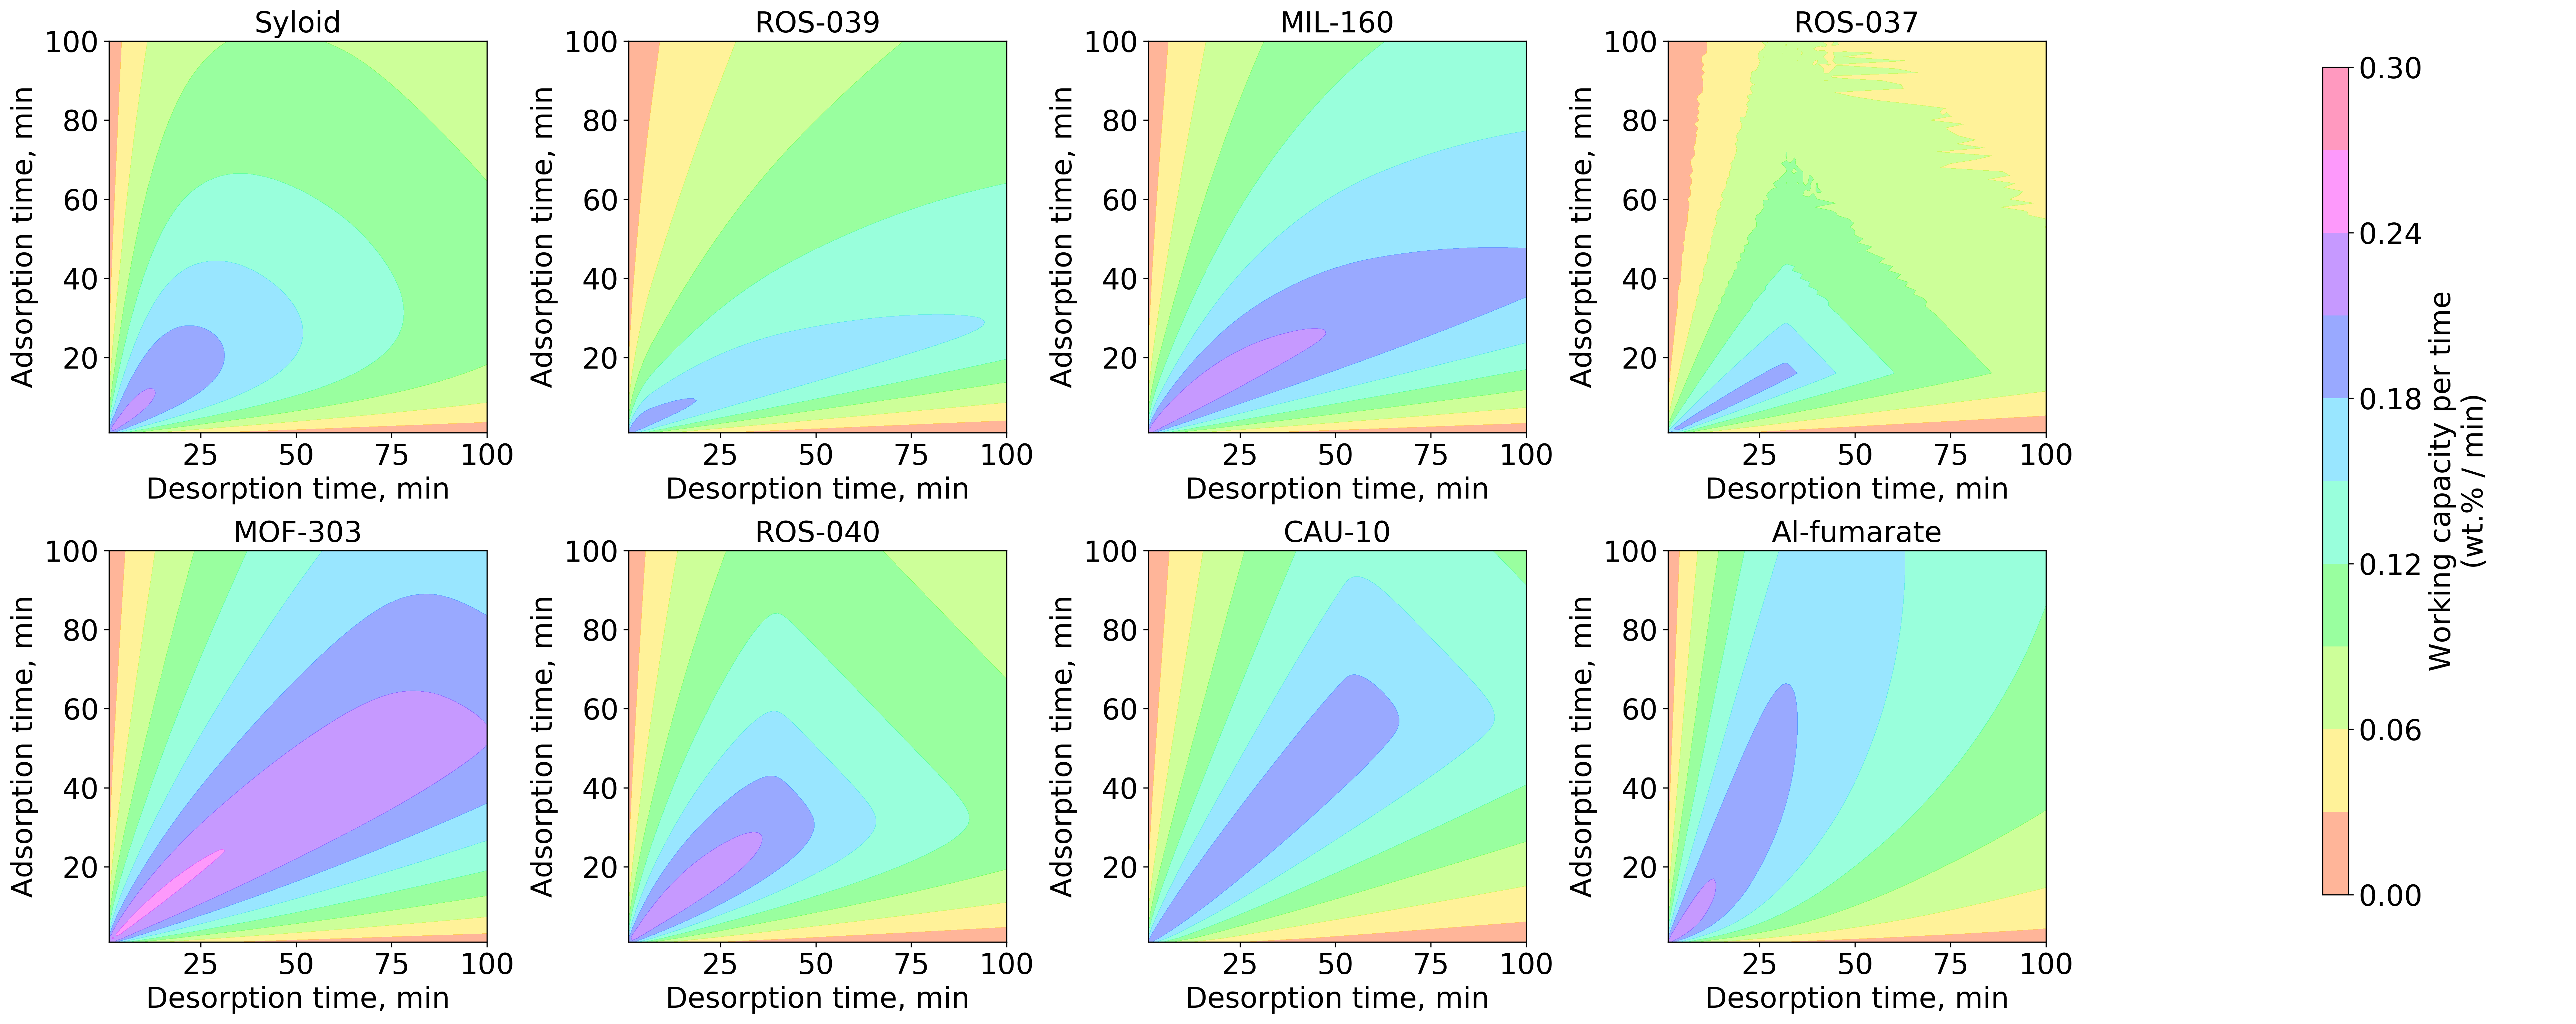

In [135]:
f, axarr = plt.subplots(2, 5, figsize = (5*5, 2*(5)), dpi=300)
max_wc = 0.3
max_diff = 1
idx = 100
text_size = 20
print(len(heatmap_list))
for i, vert_hm in enumerate(heatmap_list[:4]):
    cp1 = axarr[0, i].contourf(t_des_range[:idx], t_ads_range[:idx],vert_hm[:idx, :idx] ,
                            #levels=[h*max_wc for h in [0, 0.1, 0.2, 0.3, 0.4 ,0.5, 0.6 ,0.7, 0.8, 0.9, 1.0]],
                            levels=[h*max_wc for h in np.linspace(0, 1, 11)], vmin=0, vmax=max_wc, cmap='hsv', alpha=0.4
                           )
    axarr[0, i].tick_params(axis='x', labelsize=text_size)
    axarr[0, i].tick_params(axis='y', labelsize=text_size)
    axarr[0, i].set_xlabel('Desorption time, min', fontsize=text_size)
    axarr[0, i].set_ylabel('Adsorption time, min', fontsize=text_size)
    axarr[0, i].set_title(filelist[i].split('_')[1], fontsize=text_size)
    axarr[0, i].set_ylim([1, idx])
    axarr[0, i].set_xlim([1, idx])
    axarr[0, 4].axis('off')
for i, vert_hm in enumerate(heatmap_list[4:]):
    cp1 = axarr[1, i].contourf(t_des_range[:idx], t_ads_range[:idx],vert_hm[:idx, :idx] ,
                            #levels=[h*max_wc for h in [0, 0.1, 0.2, 0.3, 0.4 ,0.5, 0.6 ,0.7, 0.8, 0.9, 1.0]],
                            levels=[h*max_wc for h in np.linspace(0, 1, 11)], vmin=0, vmax=max_wc, cmap='hsv', alpha=0.4
                           )
    axarr[1, i].tick_params(axis='x', labelsize=text_size)
    axarr[1, i].tick_params(axis='y', labelsize=text_size)
    axarr[1, i].set_xlabel('Desorption time, min', fontsize=text_size)
    axarr[1, i].set_ylabel('Adsorption time, min', fontsize=text_size)
    axarr[1, i].set_title(filelist[i+4].split('_')[1], fontsize=text_size)
    axarr[1, i].set_ylim([1, idx])
    axarr[1, i].set_xlim([1, idx])
    axarr[1, 4].axis('off')
cax = plt.axes([0.90, 0.13, 0.01, 0.80])
cbar = plt.colorbar(cp1, cax=cax)
cbar.ax.tick_params(labelsize=text_size)
cbar.set_label('Working capacity per time\n(wt.% / min)', rotation=90, fontsize=text_size)
plt.tight_layout()
plt.savefig('Figure_Heatmaps_27C_30RH_100_2rows.png', dpi=300)
plt.show()

## Figure S109

In [136]:
#################################
###    import Sorption data   ###
#################################

path = '../../data/'

filelist = ['ROS-037/27C/ROS037_-u50_isotherm-2021-05-07 18-07-06.xlsx',
             'Syloid/27C/syloid_isotherm_25C-2021-03-19 23-03-21.xls',
           'ROS-040/27C/ROS-040_SD-01-082_isotherm_27C-2021-06-14 09-53-10.xls',
            'ROS-039/27C/SD-1-183_isotherm_27C-2021-05-18 18-59-58.xls',
            'CAU-10/27C/CAU-10-H_NK-1-1531_isotherm_-2021-06-12 15-33-08.xlsx',
            'MOF-303/27C/MOF-303_SS-1131_isotherm_27C-2021-06-14 09-53-10.xls',
           'MIL-160/27C/DJO-02-500_isotherm_27C-2021-05-18 18-59-58.xls',
           'Al-fumarate/27C/NK1091_Al-fumarate_EtOH_50-100um_27C_isotherm-2022-01-07 09-05-27.xls',
           
           ]

# color list
name_and_color_dictionary = {'CAU-10/27C/CAU-10-H_NK-1-1531_isotherm_-2021-06-12 15-33-08.xlsx':{'color':'tab:blue', 'name':'CAU-10-H'},
                             'MIL-160/27C/DJO-02-500_isotherm_27C-2021-05-18 18-59-58.xls':{'color':'r', 'name':'MIL-160'},
                            'MOF-303/27C/MOF-303_SS-1131_isotherm_27C-2021-06-14 09-53-10.xls':{'color':'g', 'name':'MOF-303'},
                            'ROS-037/27C/ROS037_-u50_isotherm-2021-05-07 18-07-06.xlsx':{'color':'m', 'name':'ROS-037'},
                            'ROS-039/27C/SD-1-183_isotherm_27C-2021-05-18 18-59-58.xls':{'color':'c', 'name':'ROS-039'},
                            'ROS-040/27C/ROS-040_SD-01-082_isotherm_27C-2021-06-14 09-53-10.xls':{'color':'darkorange', 'name':'ROS-040'},
                            'Syloid/27C/syloid_isotherm_25C-2021-03-19 23-03-21.xls':{'color':'grey', 'name':'Syloid'},
                            'Al-fumarate/27C/NK1091_Al-fumarate_EtOH_50-100um_27C_isotherm-2022-01-07 09-05-27.xls':{'color':'pink', 'name':'Al-fumarate'},
                            'ROS-038_highK/27C/AK0007_50-100um_27C_isotherm-2022-01-07 09-05-27.xls':{'color':'blue', 'name':'ROS-038_highK'},
                            'IntrinsicDVS/20200128_SS-1140_2h_16 mg_Isotherm - Tue 28 Jan 2020 11-41-10.xlsx':{'color':'cornflowerblue', 'name':'ROS-038_lowK'},
                            }

Sorption_list = []
Water_Sorption_list = []
for Sorption_filename in filelist:
    Sorption = file_Sorption()
    try:
        Sorption.read_file(path,Sorption_filename)
        if Sorption.import_success:
            if Sorption.fluid == 'water vapor':
                Water_Sorption_list.append(Sorption)
            else:
                Sorption_list.append(Sorption)
            #print(Sorption.instrument)
        else:
            del Sorption
            print(Sorption_filename, 'failed')
    except Exception as e:
        print(e)
        print(Sorption_filename, 'failed')

File ROS-037/27C/ROS037_-u50_isotherm-2021-05-07 18-07-06.xlsx read succesfull
File Syloid/27C/syloid_isotherm_25C-2021-03-19 23-03-21.xls read succesfull
File ROS-040/27C/ROS-040_SD-01-082_isotherm_27C-2021-06-14 09-53-10.xls read succesfull
File ROS-039/27C/SD-1-183_isotherm_27C-2021-05-18 18-59-58.xls read succesfull
File CAU-10/27C/CAU-10-H_NK-1-1531_isotherm_-2021-06-12 15-33-08.xlsx read succesfull
File MOF-303/27C/MOF-303_SS-1131_isotherm_27C-2021-06-14 09-53-10.xls read succesfull
File MIL-160/27C/DJO-02-500_isotherm_27C-2021-05-18 18-59-58.xls read succesfull
File Al-fumarate/27C/NK1091_Al-fumarate_EtOH_50-100um_27C_isotherm-2022-01-07 09-05-27.xls read succesfull


In [137]:
import os

number_of_steps = 100
values = {}
values['min_time'] = 1
values['step'] = 1
t_ads_range = np.linspace(float(values['min_time']), float(values['min_time']) + (number_of_steps)*float(values['step']), num=number_of_steps, endpoint=False)
t_des_range = np.linspace(float(values['min_time']), float(values['min_time']) + (number_of_steps)*float(values['step']), num=number_of_steps, endpoint=False)




path = 'kinetics_fitting/27C/'
#for i in filelist:
#    print(i)
filelist = ['Heatmap_ROS-037_ads1.0-100.0_des1.0-100.0_n100_30RH.csv',
            'Heatmap_Syloid_ads1.0-100.0_des1.0-100.0_n100_30RH.csv',
            'Heatmap_ROS-040_ads1.0-100.0_des1.0-100.0_n100_30RH.csv', 
            'Heatmap_ROS-039_ads1.0-100.0_des1.0-100.0_n100_30RH.csv', 
            'Heatmap_CAU-10_ads1.0-100.0_des1.0-100.0_n100_30RH.csv',
            'Heatmap_MOF-303_ads1.0-100.0_des1.0-100.0_n100_30RH.csv',
            'Heatmap_MIL-160_ads1.0-100.0_des1.0-100.0_n100_30RH.csv', 
            'Heatmap_Al-fumarate_ads1.0-100.0_des1.0-100.0_n100_30RH.csv'

            ]

heatmap_list = []

for filename in filelist:
    print(filename)
    working_capacity_per_time_array = np.loadtxt( path + filename,  delimiter=',')
    heatmap_list.append(working_capacity_per_time_array)

Heatmap_ROS-037_ads1.0-100.0_des1.0-100.0_n100_30RH.csv
Heatmap_Syloid_ads1.0-100.0_des1.0-100.0_n100_30RH.csv
Heatmap_ROS-040_ads1.0-100.0_des1.0-100.0_n100_30RH.csv
Heatmap_ROS-039_ads1.0-100.0_des1.0-100.0_n100_30RH.csv
Heatmap_CAU-10_ads1.0-100.0_des1.0-100.0_n100_30RH.csv
Heatmap_MOF-303_ads1.0-100.0_des1.0-100.0_n100_30RH.csv
Heatmap_MIL-160_ads1.0-100.0_des1.0-100.0_n100_30RH.csv
Heatmap_Al-fumarate_ads1.0-100.0_des1.0-100.0_n100_30RH.csv


8


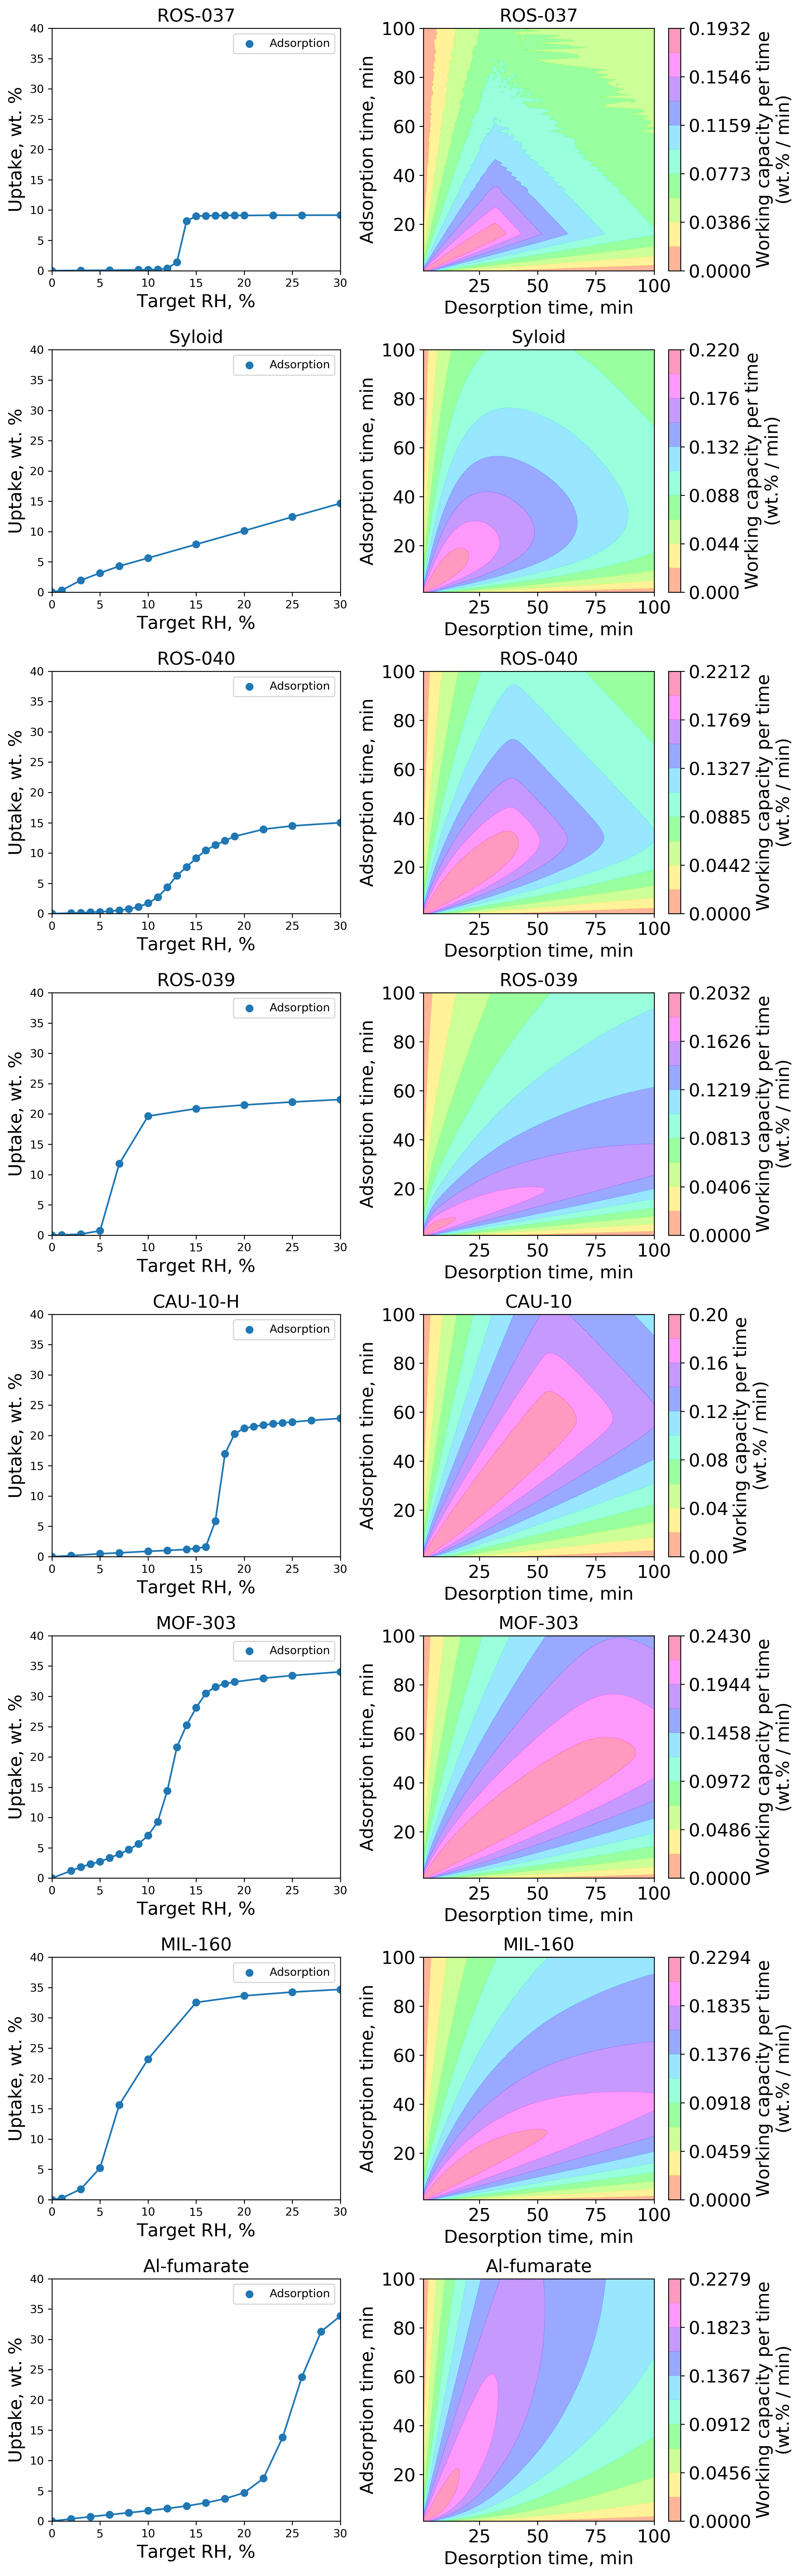

In [138]:
f, axarr = plt.subplots(8, 2, figsize = (2*5, 8*(4)), dpi=300)
max_wc = 0.3
max_diff = 1
idx = 100
text_size = 16
print(len(heatmap_list))
for n, vert_hm in enumerate(heatmap_list[:]):
    #print(i, vert_hm)
    #print(Water_Sorption_list[n])
    Water_Sorption_list[n].data['cycle_split'] = Water_Sorption_list[n].data['RH_target'].diff().fillna(0)
    split_index_ads = Water_Sorption_list[n].data.index[(Water_Sorption_list[n].data['cycle_split']>0)].to_list()
    split_index_des = Water_Sorption_list[n].data.index[(Water_Sorption_list[n].data['cycle_split']<0)].to_list()

    index_tuple = [('ads', i) for i in split_index_ads] + [('des', i) for i in split_index_des]
    index_tuple = sorted(index_tuple, key=lambda x: x[1])
    #print(index_tuple)
    isotherm_split = []
    prev = 'ads'
    for i, j in enumerate([i[0] for i in index_tuple]):
        if (j == 'ads')&(prev=='des'):
            isotherm_split.append(index_tuple[i][1])
        prev = j
    #print(isotherm_split)
    args = [0]+isotherm_split+[Water_Sorption_list[n].data.index.size]
    #args= args[:2]
    #print(args)

    for start,  end in zip(args, args[1:]):
        #print(start,  end)
        split_index_ads = Water_Sorption_list[n].data.iloc[start:end].index[(Water_Sorption_list[n].data.iloc[start:end]['cycle_split']>0)].to_list()
        split_index_des = Water_Sorption_list[n].data.iloc[start:end].index[(Water_Sorption_list[n].data.iloc[start:end]['cycle_split']<0)].to_list()

        split_index_des.append(Water_Sorption_list[n].data.iloc[start:end].index.to_list()[-1])
        split_index_ads = split_index_ads + [split_index_des[0]]

        #print(split_index_ads)
        #print(split_index_des)
        isotherm_RHtarget_ads = []
        isotherm_RHactual_ads = []
        isotherm_adsorption = []
        isotherm_RHtarget_des = []
        isotherm_RHactual_des = []
        isotherm_desorption = []
        for i, split in enumerate(split_index_ads[:]):
            isotherm_adsorption.append(Water_Sorption_list[n].data[split-10:split].uptake.median())
            if i==0:
                isotherm_RHtarget_ads.append(Water_Sorption_list[n].data[:split_index_ads[i]].RH_target.median())
                isotherm_RHactual_ads.append(Water_Sorption_list[n].data[:split_index_ads[i]].RH_actual.median())
            else:
                isotherm_RHtarget_ads.append(Water_Sorption_list[n].data[split_index_ads[i-1]:split_index_ads[i]].RH_target.median())
                isotherm_RHactual_ads.append(Water_Sorption_list[n].data[split_index_ads[i-1]:split_index_ads[i]].RH_actual.median())
        for i, split in enumerate(split_index_des[:]):
            isotherm_desorption.append(Water_Sorption_list[n].data[split-10:split].uptake.median())
            if i == 0:
                isotherm_RHtarget_des.append(Water_Sorption_list[n].data[split_index_ads[-2]:split_index_ads[-1]].RH_target.median())
                isotherm_RHactual_des.append(Water_Sorption_list[n].data[split_index_ads[-2]:split_index_ads[-1]].RH_actual.median())
            else:
                isotherm_RHtarget_des.append(Water_Sorption_list[n].data[split_index_des[i-1]:split_index_des[i]].RH_target.median())
                isotherm_RHactual_des.append(Water_Sorption_list[n].data[split_index_des[i-1]:split_index_des[i]].RH_actual.median())
        axarr[n, 0].plot(isotherm_RHtarget_ads, [i for i in isotherm_adsorption],  
                 #c=name_and_color_dictionary[Sorption.filename]['color'],
                 )
        axarr[n, 0].scatter(isotherm_RHtarget_ads, [i for i in isotherm_adsorption],     
                        #c=name_and_color_dictionary[Sorption.filename]['color'],
                            label='Adsorption'
                       )
        axarr[n, 0].set_xlabel('Target RH, %', fontsize=text_size)
        axarr[n, 0].set_ylabel('Uptake, wt. %', fontsize=text_size)
    axarr[n, 0].set_xlim([0,30])
    axarr[n, 0].set_ylim([0,40])
    axarr[n, 0].legend()
    axarr[n, 0].set_title(name_and_color_dictionary[Water_Sorption_list[n].filename]['name'], fontsize=text_size)
    
    cp1 = axarr[n, 1].contourf(t_des_range[:idx], t_ads_range[:idx],vert_hm[:idx, :idx] ,
                            #levels=[h*vert_hm.max() for h in [0, 0.1, 0.2, 0.3, 0.4 ,0.5, 0.6 ,0.7, 0.8, 0.9, 1.0]],
                            levels=[h*vert_hm.max() for h in np.linspace(0, 1, 11)], vmin=0, vmax=vert_hm.max(), cmap='hsv', alpha=0.4
                           )
    axarr[n, 1].tick_params(axis='x', labelsize=text_size)
    axarr[n, 1].tick_params(axis='y', labelsize=text_size)
    axarr[n, 1].set_xlabel('Desorption time, min', fontsize=text_size)
    axarr[ n, 1].set_ylabel('Adsorption time, min', fontsize=text_size)
    axarr[ n, 1].set_title(filelist[n].split('_')[1], fontsize=text_size)
    axarr[n, 1].set_ylim([1, idx])
    axarr[n, 1].set_xlim([1, idx])
    #cax = plt.axes([0.90, 0.13, 0.01, 0.80])
    cbar = plt.colorbar(cp1, ax=axarr[n, 1])
    cbar.ax.tick_params(labelsize=text_size)
    cbar.set_label('Working capacity per time\n(wt.% / min)', rotation=90, fontsize=text_size)
plt.tight_layout()
plt.savefig('Figure_Heatmaps_vs_isotherms_30RH.png', dpi=300)
plt.show()

## Heatmaps composites 27C, 0-30RH

In [10]:
import os

number_of_steps = 50
values = {}
values['min_time'] = 1
values['step'] = 1
t_ads_range = np.linspace(float(values['min_time']), float(values['min_time']) + (number_of_steps)*float(values['step']), num=number_of_steps, endpoint=False)
t_des_range = np.linspace(float(values['min_time']), float(values['min_time']) + (number_of_steps)*float(values['step']), num=number_of_steps, endpoint=False)


path = 'kinetics_fitting/composites_27C/'
#for i in filelist:
#    print(i)
filelist = ['Heatmap_ROS-037_ads1.0-100.0_des1.0-100.0_n100_30RH.csv',
            'Heatmap_ROS-039_ads1.0-100.0_des1.0-100.0_n100_30RH.csv',
            ]

heatmap_list = []

for filename in filelist:
    print(filename)
    working_capacity_per_time_array = np.loadtxt( path + filename,  delimiter=',')
    heatmap_list.append(working_capacity_per_time_array)

Heatmap_ROS-037_ads1.0-100.0_des1.0-100.0_n100_30RH.csv
Heatmap_ROS-039_ads1.0-100.0_des1.0-100.0_n100_30RH.csv


## Figure S170

2
5 min 5 min: 0.22127427249043635
5 min 5 min: 3.1863495238622837
5 min 5 min: 0.27077140779653347
5 min 5 min: 3.899108272270082


C:\Users\Andrey.Bezrukov\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:40: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


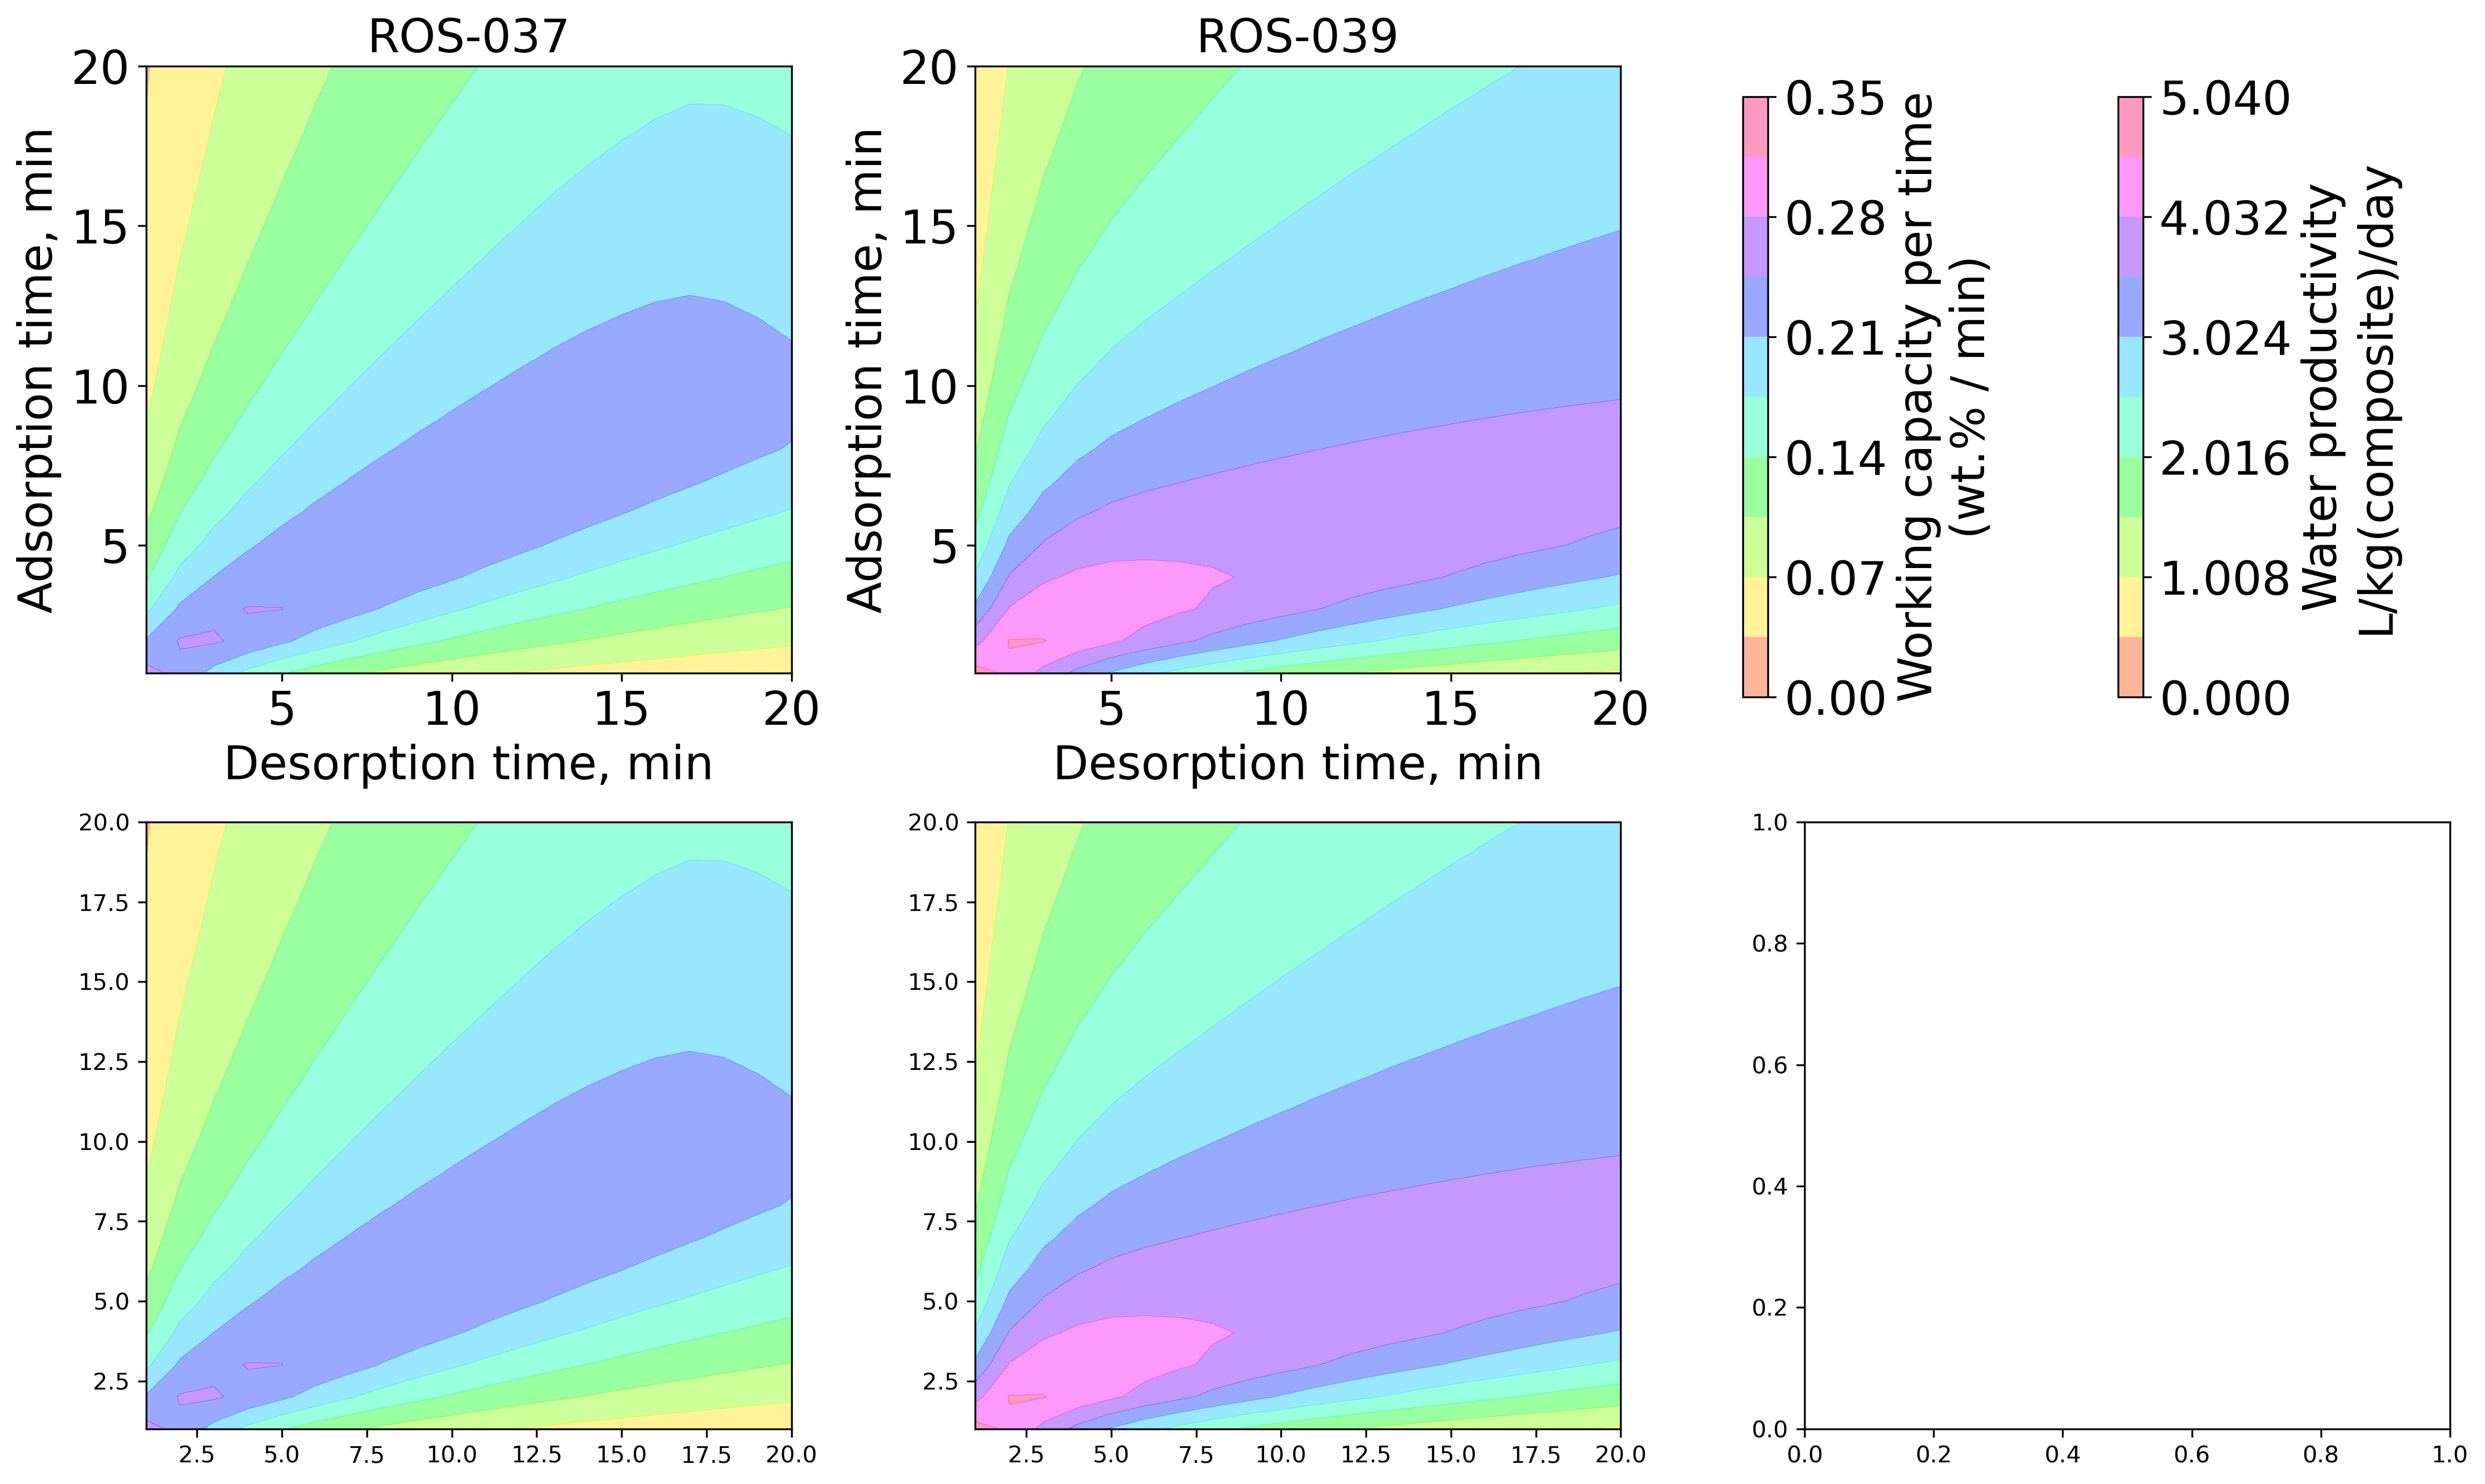

In [11]:
f, axarr = plt.subplots(2, 3, figsize = (3*5, 2*(4.5)), dpi=300)
wt_to_L = 60*24/100
max_wc = 0.35
max_diff = 1
idx = 20
text_size = 20
print(len(heatmap_list))
for i, vert_hm in enumerate(heatmap_list[:]):
    print('5 min 5 min:', vert_hm[4, 4])
    print('5 min 5 min:', vert_hm[4, 4]*wt_to_L)
    cp1 = axarr[0, i].contourf(t_des_range[:idx], t_ads_range[:idx],vert_hm[:idx, :idx] ,
                            #levels=[h*max_wc for h in [0, 0.1, 0.2, 0.3, 0.4 ,0.5, 0.6 ,0.7, 0.8, 0.9, 1.0]],
                            levels=[h*max_wc for h in np.linspace(0, 1, 11)], vmin=0, vmax=max_wc, cmap='hsv', alpha=0.4
                           )
    axarr[0, i].tick_params(axis='x', labelsize=text_size)
    axarr[0, i].tick_params(axis='y', labelsize=text_size)
    axarr[0, i].set_xlabel('Desorption time, min', fontsize=text_size)
    axarr[0, i].set_ylabel('Adsorption time, min', fontsize=text_size)
    axarr[0, i].set_title(filelist[i].split('_')[1], fontsize=text_size)
    axarr[0, i].set_ylim([1, idx])
    axarr[0, i].set_xlim([1, idx])
    cp2 = axarr[1, i].contourf(t_des_range[:idx], t_ads_range[:idx],vert_hm[:idx, :idx]*wt_to_L ,
                            #levels=[h*max_wc for h in [0, 0.1, 0.2, 0.3, 0.4 ,0.5, 0.6 ,0.7, 0.8, 0.9, 1.0]],
                            levels=[h*max_wc*wt_to_L for h in np.linspace(0, 1, 11)], vmin=0, vmax=max_wc*wt_to_L, cmap='hsv', alpha=0.4
                           )
axarr[0, 2].axis('off')
cax = plt.axes([0.70, 0.53, 0.01, 0.40])
cbar = plt.colorbar(cp1, cax=cax)
cbar.ax.tick_params(labelsize=text_size)
cbar.set_label('Working capacity per time\n(wt.% / min)', rotation=90, fontsize=text_size)

cax = plt.axes([0.85, 0.53, 0.01, 0.40])
cbar = plt.colorbar(cp2, cax=cax)
cbar.ax.tick_params(labelsize=text_size)
cbar.set_label('Water productivity\nL/kg(composite)/day', rotation=90, fontsize=text_size)

plt.tight_layout()
plt.savefig('Figure_Heatmaps_composite_0-30RH.png', dpi=300)
plt.show()